In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

data = {
    'Weight': [79, 69, 73, 95, 82, 55, 69, 71, 64, 69],
    'Height': [1.80, 1.68, 1.82, 1.70, 1.87, 1.55, 1.50, 1.78, 1.67, 1.64],
    'Age': [35, 39, 25, 60, 27, 18, 89, 42, 16, 52],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female']
}
df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True).astype(int)

X = df_encoded[['Height', 'Age', 'Gender_Male']]
y = df_encoded['Weight']

df_encoded.head(10)

,Weight,Height,Age,Gender_Male
0,79,1,35,1
1,69,1,39,1
2,73,1,25,1
3,95,1,60,1
4,82,1,27,1
5,55,1,18,0
6,69,1,89,0
7,71,1,42,0
8,64,1,16,0
9,69,1,52,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.06221203343445114
Mean Squared Error: 70.5099327361472


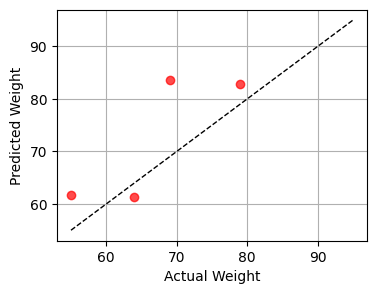

In [19]:
plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred, alpha=0.7, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.grid(True)
plt.show()